In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('X_ray_data')

Mounted at X_ray_data


In [ ]:
# rm -r sample_data

In [ ]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Sep  4 01:39 .
drwxr-xr-x 1 root root 4096 Sep  4 01:38 ..
drwxr-xr-x 4 root root 4096 Sep  1 19:26 .config
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data
drwx------ 5 root root 4096 Sep  4 01:39 X_ray_data


In [ ]:
# !ls -la

In [ ]:
# !unzip Dataset_4_classe_second_approach.zip

In [ ]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
path_data = '/content/X_ray_data/MyDrive/X-ray_data/Dataset_4_classes_balanced'

In [ ]:
Train_NORMAL = os.listdir(path_data+'/Train/NORMAL/')
print('Train_NORMAL = ', len(Train_NORMAL))

Train_Pneumocystis = os.listdir(path_data+'/Train/Pneumocystis/')
print('Train_Pneumocystis = ', len(Train_Pneumocystis))

Train_Streptococcus = os.listdir(path_data+'/Train/Streptococcus/')
print('Train_Streptococcus = ', len(Train_Streptococcus))

Train_Covid = os.listdir(path_data+'/Train/Covid/')
print('Train_Covid = ', len(Train_Covid))

Train_NORMAL =  160
Train_Pneumocystis =  133
Train_Streptococcus =  130
Train_Covid =  160


In [ ]:
Val_NORMAL = os.listdir(path_data+'/Val/NORMAL/')
print('Val_NORMAL = ', len(Val_NORMAL))

Val_Pneumocystis = os.listdir(path_data+'/Val/Pneumocystis/')
print('Val_Pneumocystis = ', len(Val_Pneumocystis))

Val_Streptococcus = os.listdir(path_data+'/Val/Streptococcus/')
print('Val_Streptococcus = ', len(Val_Streptococcus))

Val_Covid = os.listdir(path_data+'/Val/Covid/')
print('Val_Covid = ', len(Val_Covid))

Val_NORMAL =  30
Val_Pneumocystis =  30
Val_Streptococcus =  30
Val_Covid =  30


In [ ]:
print('Images_names \n ', 
      Train_NORMAL[0], '\n' ,
      Train_Covid[0], '\n' ,
      Train_Pneumocystis[0], '\n' , 
      Train_Streptococcus[1])

Images_names 
  IM-0552-0001.jpeg 
 9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg 
 Pneumocystis_0_5975.jpeg 
 Streptococcus_0_5105.jpeg


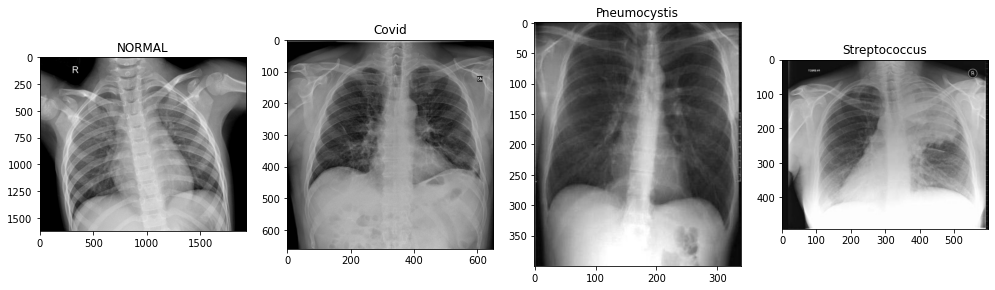

In [ ]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc

img_name = Train_NORMAL[0]
img_normal = load_img(path_data+'/Train/NORMAL/' + img_name)

img_name_1 = Train_Covid[0]
img_Covid = load_img(path_data+'/Train/Covid/' + img_name_1)

img_name_2 = Train_Pneumocystis[0]
img_Pneumocystis = load_img(path_data+'/Train/Pneumocystis/' + img_name_2)

img_name_3 = Train_Streptococcus[1]
img_Streptococcus = load_img(path_data+'/Train/Streptococcus/' + img_name_3)



fig, axs = plt.subplots(1,4,figsize=(17,10))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")

axs[1].imshow(img_Covid)
axs[1].set_title("Covid");


axs[2].imshow(img_Pneumocystis)
axs[2].set_title("Pneumocystis")

axs[3].imshow(img_Streptococcus)
axs[3].set_title("Streptococcus");


# plt.savefig("../Assets/plot_01_assets_1_4classes_second_app.png")

In [ ]:
model = Sequential()
activ = 'sigmoid'

model.add(Conv2D(32, kernel_size=(3,3),
                 activation=activ,
                 input_shape=(224,224,3)))
model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(128, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(64, activation=activ))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


In [ ]:
mtr_list = ['accuracy']

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop', 
              metrics=mtr_list)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      3

In [ ]:
train_datagen = image.ImageDataGenerator(
                featurewise_center=False, samplewise_center=False,
                featurewise_std_normalization=False, samplewise_std_normalization=False,
                zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
                height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
                channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
                horizontal_flip=True, vertical_flip=False, rescale=1./255,
                preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

In [ ]:
val_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                    directory=path_data+'/Train/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 579 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'NORMAL': 1, 'Pneumocystis': 2, 'Streptococcus': 3}

In [ ]:
validation_generator = val_dataset.flow_from_directory(
                    directory=path_data+'/Val/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 120 images belonging to 4 classes.


In [ ]:
classes = pd.DataFrame(train_generator.classes)
classes[0].value_counts(normalize=True)

1    0.274611
0    0.274611
2    0.227979
3    0.222798
Name: 0, dtype: float64

In [ ]:
save_filepath = "model_epoch_{epoch:02d}_loss_{loss:.2f}_acc_{accuracy:.2f}_val_acc_{val_accuracy:.2f}_.h5"
checkpoint = ModelCheckpoint(save_filepath, 
                             monitor='val_accuracy', 
                             verbose=1,
                             save_best_only=True, 
                             mode='max', 
                             period=1)

In [ ]:
# %%time
model_history = model.fit_generator(
                generator=train_generator, 
#                 steps_per_epoch=30, 
                epochs=200, 
                verbose=1, 
                validation_data= validation_generator, 
                validation_steps=2, 
                class_weight=None, 
                max_queue_size=10, 
                workers=1, 
                use_multiprocessing=False,
                shuffle=True, 
                initial_epoch=0,
                callbacks=[checkpoint])

Epoch 1/200
19/19 [==============================] - 166s 7s/step - loss: 2.0868 - accuracy: 0.2781 - val_loss: 1.6923 - val_accuracy: 0.2656

Epoch 00001: val_accuracy improved from -inf to 0.26562, saving model to model_epoch_01_loss_2.09_acc_0.28_val_acc_0.27_.h5
Epoch 2/200
19/19 [==============================] - 33s 2s/step - loss: 1.3046 - accuracy: 0.4421 - val_loss: 1.6372 - val_accuracy: 0.2656

Epoch 00002: val_accuracy did not improve from 0.26562
Epoch 3/200
19/19 [==============================] - 30s 2s/step - loss: 1.0814 - accuracy: 0.5112 - val_loss: 1.8785 - val_accuracy: 0.2812

Epoch 00003: val_accuracy improved from 0.26562 to 0.28125, saving model to model_epoch_03_loss_1.08_acc_0.51_val_acc_0.28_.h5
Epoch 4/200
19/19 [==============================] - 30s 2s/step - loss: 0.9717 - accuracy: 0.5682 - val_loss: 1.7605 - val_accuracy: 0.1719

Epoch 00004: val_accuracy did not improve from 0.28125
Epoch 5/200
19/19 [==============================] - 30s 2s/step - los

len(model_history.history.keys()) 
 4 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


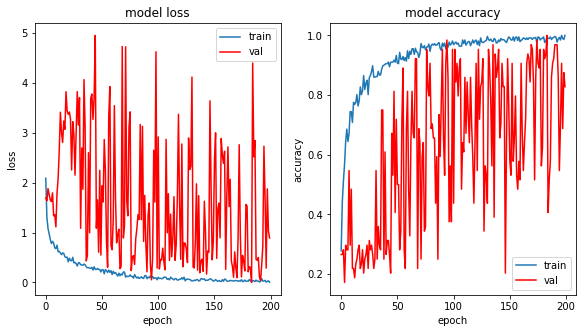

In [ ]:
# list all data in history
print('len(model_history.history.keys()) \n', len(model_history.history.keys()),'\n')
print(model_history.history.keys())


model_history_df = pd.DataFrame(model_history.history)
model_history_df


model_history_df.columns


plt.figure(figsize=(15,17))
# columns = ['loss', 'accuracy', 'mse', 'auc', 'true_positives', 'true_negatives',
#            'false_positives', 'false_negatives']
columns = ['loss', 'accuracy']
# columns = ['loss', 'acc']
for i,col in enumerate(columns):
    
    plt.subplot(3, 3, i+1)
    
    plt.plot(model_history_df[col])
    plt.plot(model_history_df['val_'+col], color='red')
    plt.title('model '+col)
    plt.ylabel(col)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
plt.savefig("plot_01_1_4classes_balanced_second_app.png")
# plt.savefig("../Figures/plot_01_1_4classes.png")



In [ ]:
# path_1 = '/content/model_epoch_64_loss_0.22_acc_0.93_val_acc_0.98_.h5'

# model = keras.models.load_model(path_1)

In [ ]:
DoubleCheck_datagen = image.ImageDataGenerator(
                featurewise_center=False, samplewise_center=False,
                featurewise_std_normalization=False, samplewise_std_normalization=False,
                zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
                height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
                channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
                horizontal_flip=True, vertical_flip=False, rescale=1./255,
                preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)


DoubleCheck_generator = DoubleCheck_datagen.flow_from_directory(
                    directory=path_data+'/Test/',
                    # directory='../Dataset_4_classe_second_approach/Train/',
#                     directory='../Codes/Models/Test_Data_Set_Sec_app/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")


model.evaluate(DoubleCheck_generator)

Found 16 images belonging to 4 classes.
1/1 [==============================] - 2s 2s/step - loss: 1.3064 - accuracy: 0.8750


[1.306418538093567, 0.875]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
model.predict_generator(DoubleCheck_generator)

array([[1.6479247e-05, 9.9998283e-01, 6.5933148e-07, 5.4559250e-09],
       [9.9999964e-01, 3.4040550e-08, 4.1223178e-08, 3.3287679e-07],
       [8.4245659e-02, 8.4318621e-08, 8.5364428e-07, 9.1575342e-01],
       [9.9982870e-01, 8.7135686e-07, 1.3897842e-06, 1.6899413e-04],
       [1.6393703e-01, 5.6682097e-06, 8.3603561e-01, 2.1757893e-05],
       [9.9999821e-01, 9.6800461e-09, 1.2375597e-06, 5.8002365e-07],
       [1.6636014e-03, 8.9768612e-08, 2.3286601e-07, 9.9833614e-01],
       [9.9999964e-01, 7.4458967e-08, 2.5276243e-08, 2.2756255e-07],
       [1.1277593e-02, 1.5709500e-07, 1.7062197e-05, 9.8870522e-01],
       [5.2923875e-05, 9.9994636e-01, 6.5940492e-07, 5.0462798e-09],
       [9.9999821e-01, 5.0636491e-08, 1.0513764e-06, 7.1428138e-07],
       [3.3742504e-04, 9.9620122e-01, 3.4548088e-03, 6.6145808e-06],
       [1.7271850e-05, 9.9998188e-01, 7.9918919e-07, 1.0149660e-08],
       [3.5105227e-04, 2.2569486e-07, 4.2823564e-07, 9.9964821e-01],
       [7.5976523e-03, 2.0458303e-

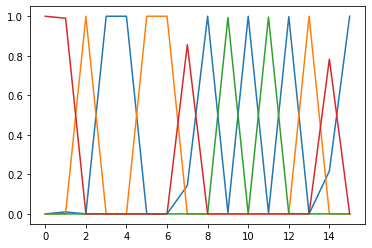

In [ ]:
est = model.predict_generator(DoubleCheck_generator)
plt.plot(est)

In [ ]:
path_data

'/content/X_ray_data/MyDrive/X-ray_data/Dataset_4_classes_balanced'

{'Covid': 0, 'NORMAL': 1, 'Pneumocystis': 2, 'Streptococcus': 3}

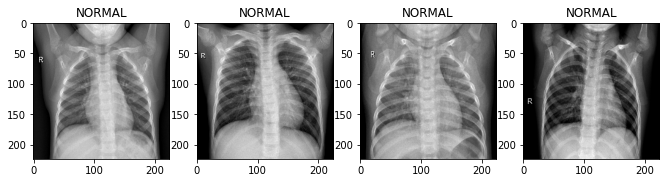

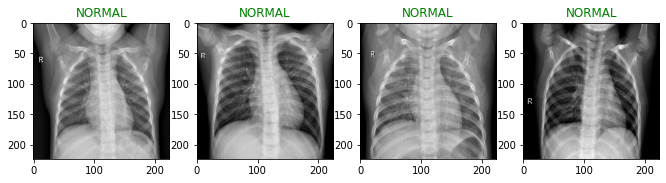

In [ ]:
Normal_img_list = os.listdir(path_data+'/Test/NORMAL/')
Normal_img_list = [i for i in Normal_img_list if i !='.DS_Store']

plt.figure(figsize=(20, 10))

for i, img in enumerate(Normal_img_list):
    path_to_img = path_data+'/Test//NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title("NORMAL")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Normal_img_list):
    path_to_img = path_data+'/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)

    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='g')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')

[0]
[0]
[0]
[0]


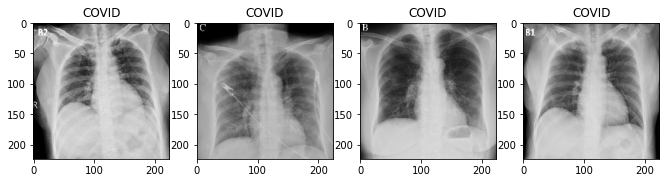

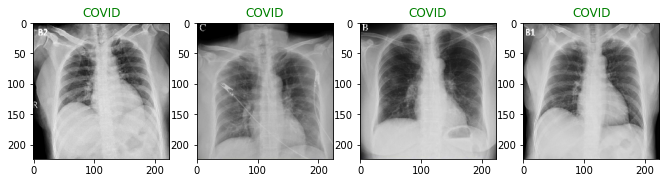

In [ ]:
COVID_img_list = os.listdir(path_data+'/Test/Covid/')
COVID_img_list = [i for i in COVID_img_list if i !='.DS_Store']

# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(20, 10))

for i, img in enumerate(COVID_img_list):
    path_to_img = path_data+'/Test/Covid/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title("COVID")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(COVID_img_list):
    path_to_img = path_data+'/Test/Covid/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    
    
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
#     feature_output = model.predict(img)
    
#     lab = np.argmax(feature_output, axis=-1)
# #     print(lab)
#     if lab[0]==0:
#         plt.title(f"COVID_{lab[0]}", color='g')
#     elif lab[0]==1:
#         plt.title(f"NORMAL_{lab[0]}", color='r')
#     elif lab[0]==2:
#         plt.title(f"Pneumocystis_{lab[0]}", color='r')
#     else:
#         plt.title(f"Streptococcus_{lab[0]}", color='r')

        
    # prediction = model.predict_classes(img, verbose=0)
    prediction = model.predict(img, verbose=0)
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)
    if prediction==0:
        plt.title("COVID", color='g')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')

[1]
[0]
[0]
[0]


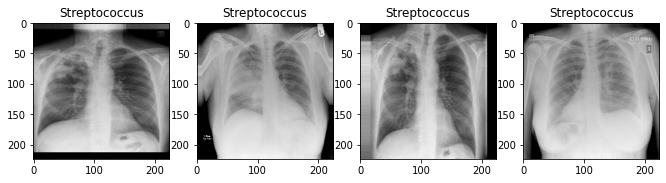

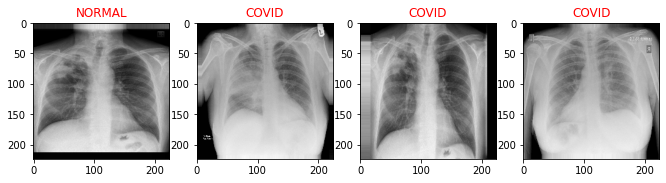

In [ ]:
Streptococcus_img_list = os.listdir(path_data+'/Test/Streptococcus/')
Streptococcus_img_list = [i for i in Streptococcus_img_list if i !='.DS_Store']

# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(20, 10))

for i, img in enumerate(Streptococcus_img_list):
    path_to_img = path_data+'/Test/Streptococcus/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title("Streptococcus")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Streptococcus_img_list):
    path_to_img = path_data+'/Test/Streptococcus/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    
    
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
    # feature_output = model.predict(img)
    prediction = model.predict(img, verbose=0)
    prediction = np.argmax(prediction,axis=1)
    print(prediction)


    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='g')


#     lab = np.argmax(feature_output, axis=-1)
# #     print(lab)
#     if lab[0]==0:
#         plt.title(f"COVID_{lab[0]}", color='r')
#     elif lab[0]==1:
#         plt.title(f"NORMAL_{lab[0]}", color='r')
#     elif lab[0]==2:
#         plt.title(f"Pneumocystis_{lab[0]}", color='r')
#     else:
#         plt.title(f"Streptococcus_{lab[0]}", color='g')

[0]
[0]
[0]
[0]


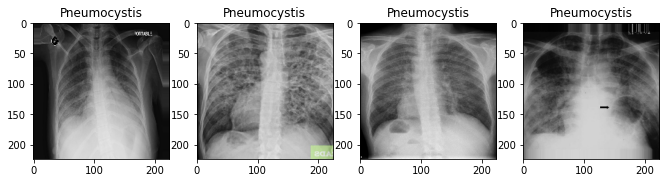

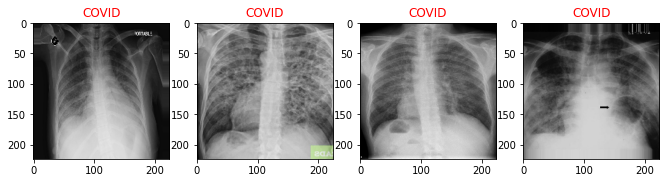

In [ ]:
Pneumocystis_img_list = os.listdir(path_data+'/Test/Pneumocystis/')
Pneumocystis_img_list = [i for i in Pneumocystis_img_list if i !='.DS_Store']

# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(20, 10))

for i, img in enumerate(Pneumocystis_img_list):
    path_to_img = path_data+'/Test/Pneumocystis/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title("Pneumocystis")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Pneumocystis_img_list):
    path_to_img = path_data+'/Test/Pneumocystis/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    
    
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
    feature_output = model.predict(img)
    

    prediction = model.predict(img, verbose=0)
    prediction = np.argmax(prediction,axis=1)
    print(prediction)


    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='g')
    else:
        plt.title("Streptococcus", color='r')


#     lab = np.argmax(feature_output, axis=-1)
# #     print(lab)
#     if lab[0]==0:
#         plt.title(f"COVID_{lab[0]}", color='r')
#     elif lab[0]==1:
#         plt.title(f"NORMAL_{lab[0]}", color='r')
#     elif lab[0]==2:
#         plt.title(f"Pneumocystis_{lab[0]}", color='g')
#     else:
#         plt.title(f"Streptococcus_{lab[0]}", color='r')